# Proyecto Sprint 10 

## Introducción 

Junto con el departamento de marketing se han recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos para una tienda online. 

Se priorizarán las hipótesis, se lanzará un test A/B y se analizarán los resultados.

In [78]:
#se importan las librerías a utilizar 
import pandas as pd
import numpy as np
import math as mth 
import matplotlib.pyplot as plt 
import scipy.stats as st

## Limpieza de datos

In [2]:
#se cargan los df a utilizar 
hipotesis = pd.read_csv ('hypotheses_us.csv', sep = ";" )
orders = pd.read_csv('orders_us.csv')
visits = pd.read_csv('visits_us.csv')

### Hipotesis 

In [3]:
#se visualiza el df hipotesis 
hipotesis

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [4]:
#se analiza la informacion 
hipotesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


In [5]:
#se analiza duplicados 
hipotesis.duplicated().sum()

np.int64(0)

- Los datos estan completos y con el formato correcto y no hay duplicados 

### Orders

In [6]:
#se visualiza el df orders
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [7]:
#se ve la info general 
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [8]:
#se transforma la fecha a formato datetime y se verifica el cambio 
orders['date'] = pd.to_datetime (orders['date'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [9]:
#se analiza la distribucion de los datos numericos 
orders.describe()

,transactionId,visitorId,date,revenue
count,1.197000e+03,1.197000e+03,1197,1197.000000
mean,2.155621e+09,2.165960e+09,2019-08-15 13:06:46.015037696,131.491646
min,1.062393e+06,5.114589e+06,2019-08-01 00:00:00,5.000000
25%,1.166776e+09,1.111826e+09,2019-08-08 00:00:00,20.800000
50%,2.145194e+09,2.217985e+09,2019-08-15 00:00:00,50.200000
75%,3.237740e+09,3.177606e+09,2019-08-23 00:00:00,130.400000
max,4.293856e+09,4.283872e+09,2019-08-31 00:00:00,19920.400000
std,1.229085e+09,1.236014e+09,NaN,603.004729


In [10]:
#se analiza duplicados 
orders.duplicated().sum()

np.int64(0)

- No se tiene registros duplicados, tampoco datos nulos y todas las variables se encuentran ya en el formato adecuado.

In [11]:
#se analiza la cantidad de usuarios por grupo 
orders.groupby ('group') ['visitorId'].nunique()

group
A    503
B    586
Name: visitorId, dtype: int64

In [12]:
#se comprueba si existen usuarios registrados en los 2 grupos 
groups_visitors = orders.groupby ('visitorId') ['group'].nunique()

In [13]:
#se cuenta cuantos usuarios estan en lso 2 grupos 
visitantes_con_multiples_grupos = groups_visitors[groups_visitors > 1]
visitantes_con_multiples_grupos

visitorId
8300375       2
199603092     2
232979603     2
237748145     2
276558944     2
351125977     2
393266494     2
457167155     2
471551937     2
477780734     2
818047933     2
963407295     2
1230306981    2
1294878855    2
1316129916    2
1333886533    2
1404934699    2
1602967004    2
1614305549    2
1648269707    2
1668030113    2
1738359350    2
1801183820    2
1959144690    2
2038680547    2
2044997962    2
2378935119    2
2458001652    2
2579882178    2
2587333274    2
2600415354    2
2654030115    2
2686716486    2
2712142231    2
2716752286    2
2780786433    2
2927087541    2
2949041841    2
2954449915    2
3062433592    2
3202540741    2
3234906277    2
3656415546    2
3717692402    2
3766097110    2
3803269165    2
3891541246    2
3941795274    2
3951559397    2
3957174400    2
3963646447    2
3972127743    2
3984495233    2
4069496402    2
4120364173    2
4186807279    2
4256040402    2
4266935830    2
Name: group, dtype: int64

In [ ]:
#se filtra solo los registros que no están en la lista de usuarios en los 2 grupos y se crea nuevo df 
orders2 = orders[~orders['visitorId'].isin(visitantes_con_multiples_grupos.index)]

In [ ]:
#se verifica que ya no hayan usuarios en ambos grupos
groups_visitors2 = orders2.groupby ('visitorId') ['group'].nunique()
visitantes_con_multiples_grupos2 = groups_visitors2[groups_visitors2 > 1]
visitantes_con_multiples_grupos2

Series([], Name: group, dtype: int64)

In [16]:
orders2.groupby ('group') ['visitorId'].nunique()

group
A    445
B    528
Name: visitorId, dtype: int64

In [26]:
orders2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   float64       
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB


### Visits 

In [17]:
#se visualizan los datos 
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [18]:
#se ve la informacion general 
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [19]:
#se tranforma la fecha a formato datetime y se verifica
visits['date'] = pd.to_datetime(visits['date'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [20]:
visits.describe()

,date,visits
count,62,62.000000
mean,2019-08-16 00:00:00,607.290323
min,2019-08-01 00:00:00,361.000000
25%,2019-08-08 06:00:00,534.000000
50%,2019-08-16 00:00:00,624.500000
75%,2019-08-23 18:00:00,710.500000
max,2019-08-31 00:00:00,770.000000
std,NaN,114.400560


- Todos los datos estan completos, y con el formato adecuado. Se tiene resgistros para el # de visitas para todos los dias del mes tanto para el grupo A como para el grupo B. 

### Parte 1. Priorizar hipótesis 

##### 1. Aplicar el framework ICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.

In [21]:
#Calcular el ICE y order de manera descendente por ICE
hipotesis['ICE'] = ((hipotesis['Impact'] * hipotesis['Confidence']) / hipotesis ['Effort']).round (2)
hipotesis_ICE = hipotesis.sort_values(by = 'ICE', ascending = False)
ICE = hipotesis_ICE[['Hypothesis', 'ICE']]
ICE

,Hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.20
0,Add two new channels for attracting traffic. T...,13.33
7,Add a subscription form to all the main pages....,11.20
6,Show banners with current offers and sales on ...,8.00
2,Add product recommendation blocks to the store...,7.00
1,Launch your own delivery service. This will sh...,2.00
5,Add a customer review page. This will increase...,1.33
3,Change the category structure. This will incre...,1.12
4,Change the background color on the main page. ...,1.00


##### 2. Aplicar el framework RICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.

In [22]:
#Calcular el RICE y order de manera descendente por RICE
hipotesis['RICE'] = ((hipotesis['Reach'] * hipotesis['Impact'] * hipotesis['Confidence']) / hipotesis ['Effort']).round (2)
hipotesis_RICE = hipotesis.sort_values(by = 'RICE', ascending = False)
RICE = hipotesis_RICE[['Hypothesis', 'RICE']]
RICE

,Hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


##### 3. Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. Proporcionar una explicación de los cambios.

In [23]:
#Se unen las tablas para ver como cambia la priorizacion del Rice 
priorizacion = RICE.merge (ICE, on = 'Hypothesis')
priorizacion


,Hypothesis,RICE,ICE
0,Add a subscription form to all the main pages....,112.0,11.20
1,Add product recommendation blocks to the store...,56.0,7.00
2,Add two new channels for attracting traffic. T...,40.0,13.33
3,Show banners with current offers and sales on ...,40.0,8.00
4,Launch a promotion that gives users discounts ...,16.2,16.20
5,Change the category structure. This will incre...,9.0,1.12
6,Launch your own delivery service. This will sh...,4.0,2.00
7,Add a customer review page. This will increase...,4.0,1.33
8,Change the background color on the main page. ...,3.0,1.00


- Se puede ver que la priorización al usar el RICE cambia respecto al resultado del ICE, en donde la más importante viene a ser "Add a subscription form to all the main pages..." con una gran diferencia de prioridad con la siguiente hipótsis. A comparación de la hipótesis de mayor prioridad del ICE que viene a ser "Launch a promotion that gives users discounts... ". La más importante del RICE está en tercer lugar en el ICE. Es importante mencionar que en el RICE se inlcuye el Alcance que dice la cantidad de usuarios que se verán afectados por las actualizaciones. En este caso, RICE prioriza dicha hipótesis ya que tiene un alcance de 10 puntos sobre 10. 

### Parte 2. Análisis del test A/B

##### 1. Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.

In [29]:
orders2.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


In [32]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [37]:
#se crea el dataframe con datos acumulados a utilizar 
datesgroups = orders2[['date', 'group']].drop_duplicates()

In [ ]:
#se calcula el acumulado para el df orders2
orderscumulative = datesgroups.apply(lambda x: orders2[np.logical_and (
    orders2 ['date']<= x['date'],orders2['group'] == x['group'])].agg ({'date': 'max', 
    'group': 'max', 'transactionId': pd.Series.nunique , 'visitorId': pd.Series.nunique, 'revenue': 'sum'}), 
    axis = 1).sort_values (by= ['date', 'group'])

In [39]:
#se calcula el acumulado para el df visits 
visitscumulative = datesgroups.apply(lambda x: visits[np.logical_and (
    visits ['date']<= x['date'],visits['group'] == x['group'])].agg ({'date': 'max', 
    'group': 'max', 'visits':'sum'}), axis = 1).sort_values (by= ['date', 'group'])

In [40]:
#se fuciona las 2 tablas para tener el acumulado junto 
cumulative = orderscumulative.merge (visitscumulative, left_on= ['date', 'group'], right_on = ['date', 'group'])
cumulative.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']
cumulative.head()

,date,group,orders,buyers,revenue,visits
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


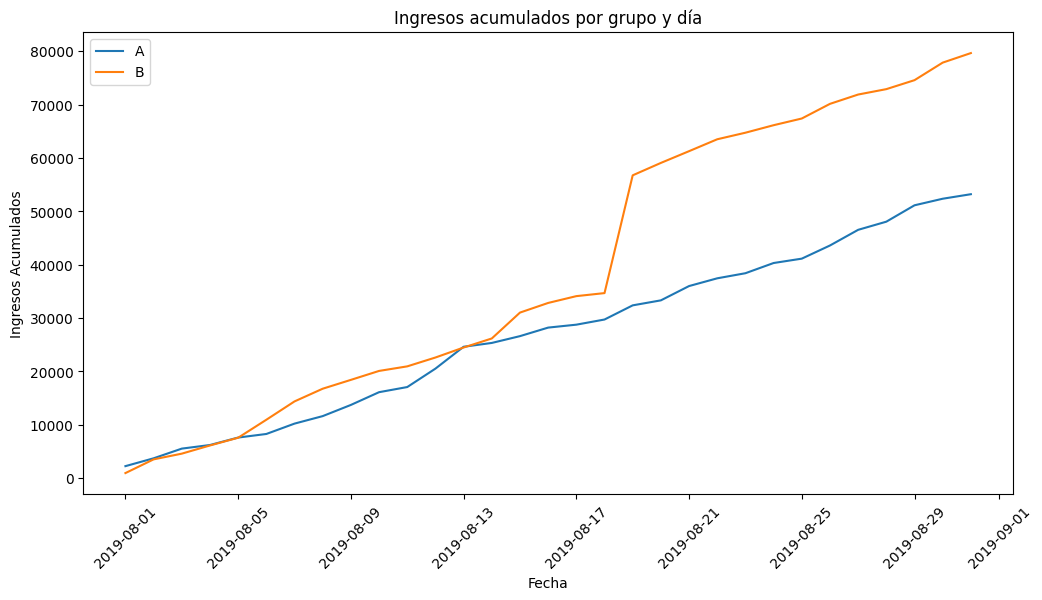

In [63]:
#se crea un grafico para el ingreso acumulado por grupo y dia 
cumulativerevA = cumulative[cumulative['group'] == 'A'][['date', 'revenue', 'orders']]
cumulativerevB = cumulative[cumulative['group'] == 'B'][['date', 'revenue', 'orders']]

plt.figure(figsize= (12,6))
plt.plot (cumulativerevA['date'], cumulativerevA['revenue'], label = 'A')
plt.plot (cumulativerevB['date'], cumulativerevB['revenue'], label = 'B')
plt.title ('Ingresos acumulados por grupo y día')
plt.xlabel ("Fecha")
plt.ylabel ("Ingresos Acumulados")
plt.xticks(rotation=45)
plt.legend()

- En el gráfico previo se puede visualizar los ingresos acumulados por grupo por día. Es evidente que la primera semana de la prueba, los ingresos estaban bastantes parejos pero desde la mitad del mes en adelante los ingresos del grupo B incrementaron drácticamente siendo bastante superiores a los ingresos acumulados del grupo A

##### 2. Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.

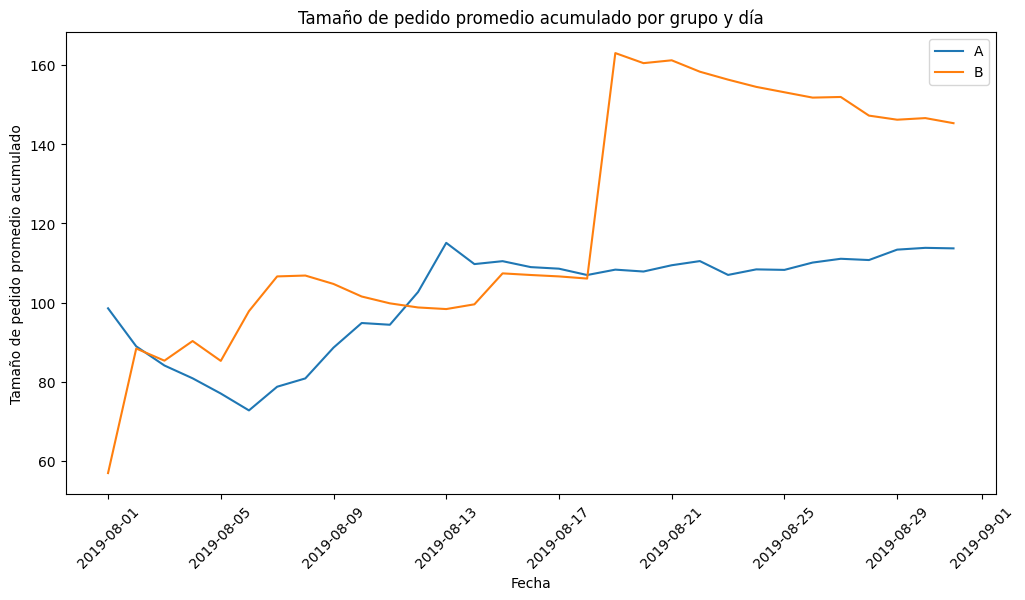

In [49]:
#se crea un gráfico para el tamaño de pedido promedio acumulado por grupo y día
plt.figure(figsize= (12,6))
plt.plot (cumulativerevA['date'], cumulativerevA['revenue'] / cumulativerevA['orders'], label = 'A')
plt.plot (cumulativerevB['date'], cumulativerevB['revenue'] / cumulativerevB['orders'], label = 'B')

plt.title ('Tamaño de pedido promedio acumulado por grupo y día')
plt.xlabel ("Fecha")
plt.ylabel ("Tamaño de pedido promedio acumulado")
plt.xticks(rotation=45)
plt.legend()

- Se puede ver que hubo un momento en que el tamaño de pedido promedio acumulado para el grupo A superó al grupo B sin embargo se igualaron unos días después y seguido el grupo B tuvo un incremento en 1 solo día y después empezó a bajar lentamente. Sin embargo el tamaño de pedido promedio se mantiene mayor para el grupo B. Se puede analizar si el pico del grupo B corresponde a datos atípicos. 

##### 3. Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.

In [92]:
#se une las 2 tablas acumuladas en una sola
mergecumulative = cumulativerevA.merge (cumulativerevB, on = 'date', how = 'left', suffixes= ['A', 'B'])
mergecumulative.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,2266.6,23,967.2,17
1,2019-08-02,3734.9,42,3535.3,40
2,2019-08-03,5550.1,66,4606.9,54
3,2019-08-04,6225.6,77,6138.5,68
4,2019-08-05,7623.6,99,7587.8,89


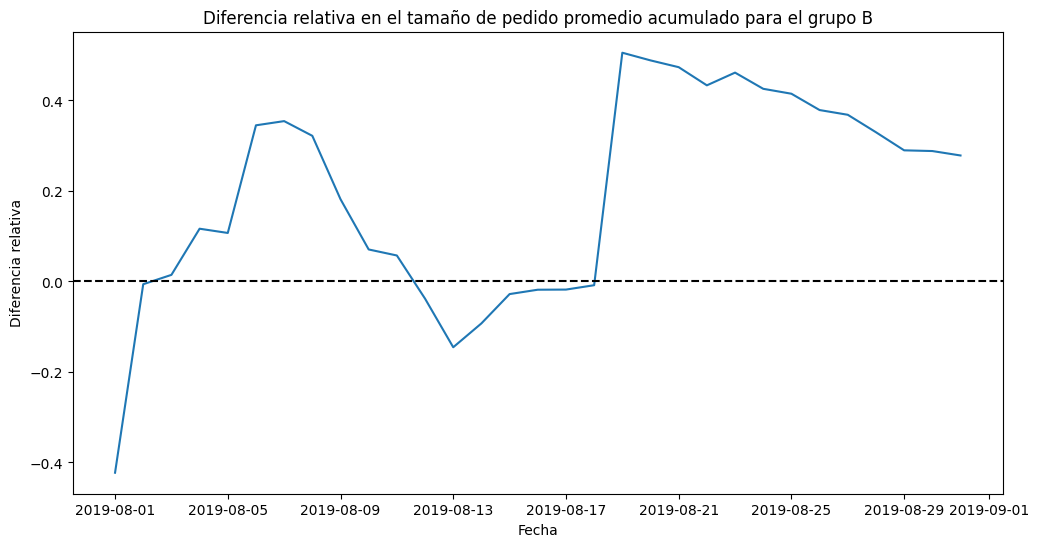

In [56]:
#se traza la diferencia relativa en el tamaño de pedido promedio acumulado
plt.figure(figsize= (12,6))
plt.plot (mergecumulative['date'], (mergecumulative['revenueB'] / mergecumulative['ordersB']) / 
          (mergecumulative['revenueA'] / mergecumulative['ordersA']) -1)
plt.title ('Diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B')
plt.xlabel ("Fecha")
plt.ylabel ("Diferencia relativa")
plt.axhline (y = 0, color = 'black', linestyle = '--')



- En vario puntos la diferencia entre los grupos aumenta. Esto nos puede decir que hay pedidos grandes y podrían haber valores atípicos. 

##### 4. Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.

In [60]:
#se calcula la conversión 
cumulative ['conversion'] = cumulative ['orders'] / cumulative['visits']
cumulative.head()

,date,group,orders,buyers,revenue,visits,conversion
0,2019-08-01,A,23,19,2266.6,719,0.031989
1,2019-08-01,B,17,17,967.2,713,0.023843
2,2019-08-02,A,42,36,3734.9,1338,0.031390
3,2019-08-02,B,40,39,3535.3,1294,0.030912
4,2019-08-03,A,66,60,5550.1,1845,0.035772


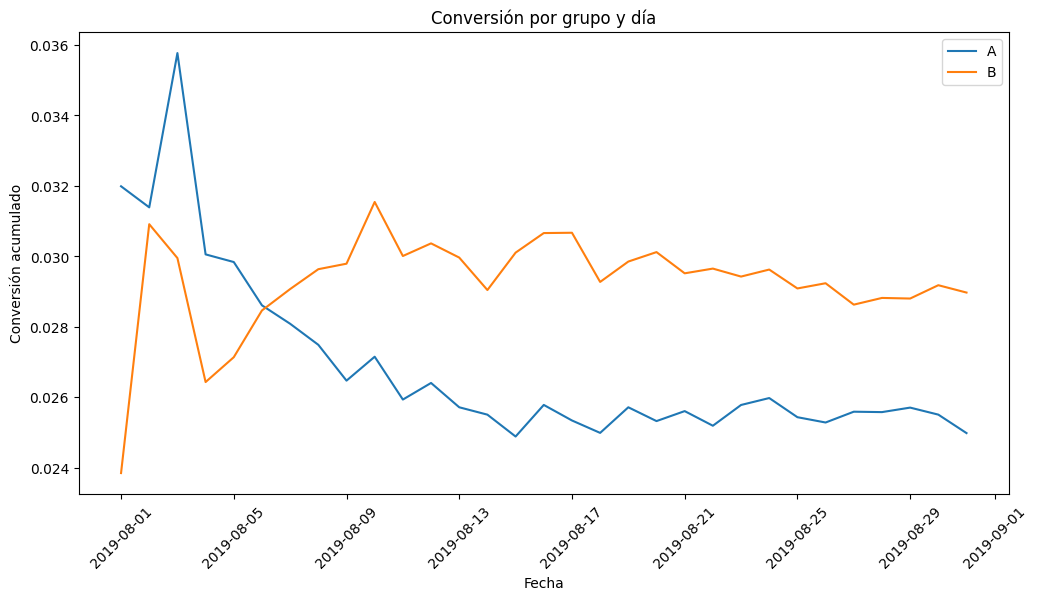

In [65]:
#se traza un gráfico para visualizar gráficamente el cambio de conversión por grupo por día 
# se selecciona los grupos A y B 

cumulativeA = cumulative[cumulative['group'] == 'A']
cumulativeB = cumulative[cumulative['group'] == 'B']

plt.figure(figsize= (12,6))
plt.plot (cumulativeA['date'], cumulativeA['conversion'], label = 'A')
plt.plot (cumulativeB['date'], cumulativeB['conversion'], label = 'B')

plt.title ('Conversión por grupo y día')
plt.xlabel ("Fecha")
plt.ylabel ("Conversión acumulado")
plt.xticks(rotation=45)
plt.legend()

- Al igual que en el análisis de las otras métricas, la tasa de conversión acumulada para el rupo B es mayor que la conversión del grupo A aumentado en un 1.3% Hasta este momento se podría decir que el experimento ha dado resultado. Sin embargo se debe verificar que exista una diferencia estadística entre los valores. 

##### 5. Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.

In [ ]:
# se calcula el # de pedidos por usuario 
ordersbyusers = orders2.groupby('visitorId', as_index = False)['transactionId'].nunique ()
ordersbyusers.sort_values(by = 'transactionId', ascending = False).head(10)

,visitorId,transactionId
478,2108163459,3
55,249864742,3
138,611059232,3
632,2742574263,3
687,2988190573,3
890,3908431265,3
908,3967698036,3
118,522292794,2
94,406208401,2
323,1404560065,2


Text(0.5, 1.0, 'Pedidos por usuario al mes')

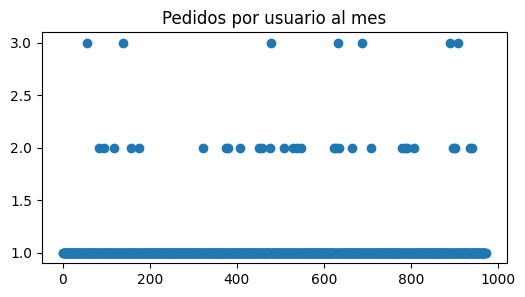

In [71]:
# se grafica el # de pedidos por usuario para identificar la dispersión. 
plt.figure(figsize= (6,3))
x_values = pd.Series(range (0, len(ordersbyusers)))
plt.scatter(x_values, ordersbyusers['transactionId'])

plt.title ('Pedidos por usuario al mes')



- Se puede ver que hay muy pocos usuarios que han realizado 3 pedidos al mes lo cual está fuera de lo normal. Se puede decir que 1 pedido por usuario es lo habitual. Estos se podrían considerar valores atípicos.

##### 6. Calcula los percentiles 95 y 99 del número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [74]:
#se calucla los percentiles 95 y 99 del # de pedidos por usuario 
np.percentile(ordersbyusers['transactionId'], [95,99])

array([1., 2.])

- Esto nos dice que el 95% de los usuarios realizaron solamente 1 pedido, es decir que solo el 5% tienen 2 pedidos o más y en este caso, solo el 1% de los usuarios realizacon 3 pedidos. 
- Con esta información se puede establecer que los usuarios con más de 2 pedidos se consideran como anomalía. 

##### 7. Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.

Text(0.5, 1.0, 'Dispersion de Precio de Pedidos')

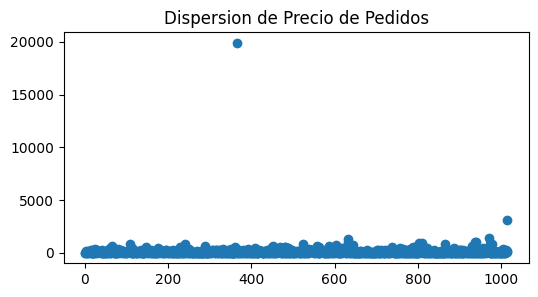

In [75]:
#se grafica la distribución de los precios de los pedidos
x_values = pd.Series(range (0, len(orders2['revenue'])))

plt.figure(figsize= (6,3))
plt.scatter (x_values, orders2['revenue'] )

plt.title ('Dispersion de Precio de Pedidos')

- Se puede ver que hay 2 pedidos que podrían pasar por anomalías, especialmente el pedido que está cerca de 20000.

##### 8. Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [76]:
#se calcula el percentil 95,99 para los precios por pedido
np.percentile(orders2['revenue'], [95,99])

array([414.275, 830.3  ])

- El 95% de los pedidos tienen un valor de 414.2, mientras que solo más del 95% son pedidos de hasta 830 y solo el 1% son pedidos mayores a 830. Por esta razón se puede considerar que todos los pedidos dentro de este 1% son anomalías. 

##### 9. Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [81]:
#se crean variables para almacenar visitorId y transactonId
visit_tranA = orders2[orders2['group'] == 'A'].groupby('visitorId', as_index = False).agg(
    {'transactionId': pd.Series.nunique})
visit_tranA.columns = ['userId', 'orders']

visit_tranB = orders2[orders2['group'] == 'B'].groupby('visitorId', as_index = False).agg(
    {'transactionId': pd.Series.nunique})
visit_tranB.columns = ['userId', 'orders']

In [84]:
#se crean muestras para A y B y poder correr la prueba de mann-whitney
sampleA = pd.concat([visit_tranA['orders'], pd.Series (0, index = 
                              np.arange (visits[visits['group'] == 'A'] ['visits'].sum() - 
                                         len (visit_tranA['orders'])), name = 'orders')], axis = 0)

sampleB = pd.concat([visit_tranB['orders'], pd.Series (0, index = 
                              np.arange (visits[visits['group'] == 'B'] ['visits'].sum() - 
                                         len (visit_tranB['orders'])), name = 'orders')], axis = 0)

- Se establecen las hipótesis: 

Ho: Las tasas de conversión del grupo A y B no presentan diferencias estdísticamente significativas.

Ha: Las tasa de conversión del grupo A y B presenta diferencias estadísticamente significativas. 

In [88]:
#se realiza la prueba para encontrar si hy diferencia significatia entre las tasas de conversión
alpha = 0.05 

results = st.mannwhitneyu(sampleA, sampleB)
print ('p_value:' , results.pvalue)

if (results.pvalue < alpha): 
    print ('Hipótesis nula rechazada: existen diferencias significativas entre las distribuciones de las tasas de conversión entre el grupo A y B')
else: 
    print ('No se puede rechazar la hipótesis nula: No se puede sacar conclusiones sobre la diferencia')

p_value: 0.011018084110014696
Hipótesis nula rechazada: existen diferencias significativas entre las distribuciones de las tasas de conversión entre el grupo A y B


- Al analizar la significancia estadística, se concluye que si existe una diferencia significativamente estadística entre las tasas de conversión para el grupo A y B. Comparando con los análisis anteriores, ha aumentado la tasa de conversión para el grupo B.

##### 10. Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

- Se establecen las hipótesis: 

Ho: El tamaño promedio de pedido del grupo A y B no presentan diferencias estdísticamente significativas.

Ha: El tamaño promedio de pedido del grupo A y B presenta diferencias estadísticamente significativas. 

In [90]:
#se pasa los datos del revenue a la prueba 
alpha = 0.05 

results2 = st.mannwhitneyu(orders2[orders2['group'] == 'A']['revenue'], orders2[orders2['group'] == 'B']['revenue'])
print ('p_value:' , results2.pvalue)

if (results2.pvalue < alpha): 
    print ('Hipótesis nula rechazada: existen diferencias significativas entre las distribuciones del tamaño promedio de pedido entre el grupo A y B')
else: 
    print ('No se puede rechazar la hipótesis nula: No se puede sacar conclusiones sobre la diferencia')

print (orders2[orders2['group'] == 'B']['revenue'].mean()/ orders2[orders2['group'] == 'A']['revenue'].mean() - 1)

p_value: 0.8622329690015668
No se puede rechazar la hipótesis nula: No se puede sacar conclusiones sobre la diferencia
0.27834487693078414


- Al finalizar con el análisis de significancia estadística sobre el tamaño de pedido se concluye que no existe un cambio estadísticamente significativo después del experimento para el grupo B. A pesar de que se tienen que el tamaño pedido promedio para el grupo B es 27% mayor, se puede deber a los datos atípicos. ac continuación se hará el análisis excluyendo estos. 

##### 11. Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

- Se recuerda que los percentiles 95 y 99 para número de pedidos por usuario fue de 1 y 2. Los percentiles 95 y 99 para tamaño de pedidos fue de $414.275 y  $830.3. 
- Se define como usuarios anómalos aquellos que realizan más de 2 pedidos o un pedido mayor a $850. 

In [97]:
#se realiza un filtrado para identificar cuántos usuarios son anómalos 
ordersanomalo = pd.concat ([visit_tranA[visit_tranA['orders'] > 2]['userId'], 
                           visit_tranB[visit_tranB['orders'] > 2]['userId']], axis = 0)
expensiveanomalo = orders2[orders2['revenue'] > 850]['visitorId']

abnormalusers = pd.concat([ordersanomalo, expensiveanomalo], axis = 0).drop_duplicates().sort_values()
print (abnormalusers.head(5))
print (abnormalusers.shape)

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
dtype: int64
(16,)


- Se tienen 16 usuarios dentro del grupo de usuarios anómalos 

In [98]:
#se crean muestras con los grupos filtrados 

sampleAFiltered = pd.concat([visit_tranA[np.logical_not(visit_tranA['userId']. isin (abnormalusers))]['orders'], 
                             pd.Series (0, index = np.arange (visits[visits['group'] == 'A'] ['visits'].sum() - 
                                         len (visit_tranA['orders'])), name = 'orders')], axis = 0)

sampleBFiltered = pd.concat([visit_tranB[np.logical_not(visit_tranB['userId']. isin (abnormalusers))]['orders'],
                              pd.Series (0, index = np.arange (visits[visits['group'] == 'B'] ['visits'].sum() - 
                                         len (visit_tranB['orders'])), name = 'orders')], axis = 0)


- Se establecen las hipótesis: 

Ho: Las tasas de conversión de los datos sin anomalias para el grupo A y B no presentan diferencias estdísticamente significativas.

Ha: Las tasas de conversión de los datos sin anomalias para el grupo A y B presenta diferencias estadísticamente significativas. 

In [99]:
#se realiza la prueba para encontrar si hay diferencia significatia entre las tasas de conversión
alpha = 0.05 

results = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)
print ('p_value:' , results.pvalue)

if (results.pvalue < alpha): 
    print ('Hipótesis nula rechazada: existen diferencias significativas entre las distribuciones de las tasas de conversión entre el grupo A y B')
else: 
    print ('No se puede rechazar la hipótesis nula: No se puede sacar conclusiones sobre la diferencia')

p_value: 0.007021302207652193
Hipótesis nula rechazada: existen diferencias significativas entre las distribuciones de las tasas de conversión entre el grupo A y B


- Al analizar la significancia estadística de los datos filtrados para la tasa de conversión de los grupos A y B, el resultadose mantiene respecto al anterior. Se concluye que existe diferencia significativa siendo B mayor.  

##### 12. Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [102]:
#se crea grupos 
revenueFilterA = orders2[np.logical_and (orders2 ['group'] == 'A', np.logical_not (orders2 ['visitorId'].
                      isin (abnormalusers)))]['revenue']

revenueFilterB = orders2[np.logical_and (orders2 ['group'] == 'B', np.logical_not (orders2 ['visitorId'].
                      isin (abnormalusers)))]['revenue']

In [103]:
#se pasa los datos del revenue a la prueba 
alpha = 0.05 

results = st.mannwhitneyu(revenueFilterA, revenueFilterB)
print ('p_value:' , results.pvalue)

if (results.pvalue < alpha): 
    print ('Hipótesis nula rechazada: existen diferencias significativas entre las distribuciones del tamaño promedio de pedido entre el grupo A y B')
else: 
    print ('No se puede rechazar la hipótesis nula: No se puede sacar conclusiones sobre la diferencia')

print (revenueFilterB.mean()/ revenueFilterA.mean() - 1)

p_value: 0.8220253140355853
No se puede rechazar la hipótesis nula: No se puede sacar conclusiones sobre la diferencia
-0.03189908748968884


- Al filtrar los datos y volver a realizar la prueba estadística, se mantiene la misma conclusión que con los datos no filtrados. No se puede sacar conclusiones sobre queexiste una diferencia significativa en los tamaños promedio de pedidos. A diferencia de lo datos no filtrados, aquí podemos ver que el 21% superior de B sobre A se reduce a -3%, es decir que los ingresos de los usuarios del grupo B son ligeramente más bajos. 

##### 13. Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Parar la prueba, considerar a uno de los grupos como líder. 2. Parar la prueba, concluir que no hay diferencia entre los grupos. 3. Continuar la prueba.

- Al finalizar el análisis de la prueba A/B realizada, se puede concluir que se debe para la prueba y se da como grupo líder al grupo B. Se obtiene una mayor tasa de conversión para el grupo B respecto al grupo A y se asegura que existe diferencia significativa en esta diferencia. A pesar de que no se encuentra diferencia en tamaño promedio de pedido, una mayor tasa de conversión ocaciona que existan mayores pedidos y a pesar de que el tamaño de pedido promedio no cambia, se espera que a futuro este incremento en la tasa de conversión muestre aumentos en los ingresos. Es posible que los nuevos usuarios convertidos incrementen su tamaño promedio de pedido conforme van siendo clientes por más tiempo.